In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

2023-11-20 15:25:53.699199: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-20 15:25:54.156054: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-20 15:25:54.156138: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-20 15:25:54.159113: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-20 15:25:54.401645: I tensorflow/core/platform/cpu_feature_g

In [10]:
df=pd.read_excel('stream_classify.xlsx')
df.head()

,Unnamed: 0,JSKR_LINKAGE_KEY,STREAM_PLACEMENT_DESC,GENDER,INDIGENOUS,HOMELESS,PWD,CALD,REFUGEE,EX_OFFENDER,AGE_GROUP,UE_GROUP,EDUCATION_ADJ,STREAM_TEMP
0,0,1,Stream A,Female,0,0,0,1,0,0,50 to 54 years,Under 12 Months,Degree,0
1,4,2,Stream C,Female,0,1,0,0,0,0,25 to 29 years,24 to 59 Months,Diploma,1
2,12,7,Stream C,Male,0,0,1,0,0,0,30 to 39 years,60+ Months,<Year 10,1
3,19,12,Stream C,Female,0,1,1,0,0,0,30 to 39 years,24 to 59 Months,Year 10/11,1
4,20,13,Stream A,Female,0,0,0,0,0,0,Under 22 years,Under 12 Months,Year 10/11,0


In [11]:
for col in df.columns:
    print(col + " : " + str(df[col].dtype))

Unnamed: 0 : int64
JSKR_LINKAGE_KEY : int64
STREAM_PLACEMENT_DESC : object
GENDER : object
INDIGENOUS : int64
HOMELESS : int64
PWD : int64
CALD : int64
REFUGEE : int64
EX_OFFENDER : int64
AGE_GROUP : object
UE_GROUP : object
EDUCATION_ADJ : object
STREAM_TEMP : int64


In [42]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
    # tf.keras.layers.Dense(3, activation="softmax"),
])

In [43]:
# col_train=['INDIGENOUS', 'HOMELESS', 'PWD', 'CALD', 'REFUGEE', 'EX_OFFENDER']
col_train=['HOMELESS', 'PWD', 'CALD', 'REFUGEE', 'EX_OFFENDER']
x=df[col_train]
y=df['STREAM_TEMP']
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
history=model.fit(x, y, epochs=50, validation_split=0.2, batch_size=1024, shuffle=True)

Epoch 1/50
380/380 [==============================] - 4s 8ms/step - loss: 0.5837 - accuracy: 0.7452 - val_loss: 0.4443 - val_accuracy: 0.7986
Epoch 2/50
380/380 [==============================] - 3s 7ms/step - loss: 0.4948 - accuracy: 0.7610 - val_loss: 0.4347 - val_accuracy: 0.7997
Epoch 3/50
380/380 [==============================] - 3s 7ms/step - loss: 0.4822 - accuracy: 0.7624 - val_loss: 0.4296 - val_accuracy: 0.7997
Epoch 4/50
380/380 [==============================] - 2s 6ms/step - loss: 0.4765 - accuracy: 0.7624 - val_loss: 0.4288 - val_accuracy: 0.7997
Epoch 5/50
380/380 [==============================] - 3s 8ms/step - loss: 0.4745 - accuracy: 0.7627 - val_loss: 0.4274 - val_accuracy: 0.7997
Epoch 6/50
380/380 [==============================] - 3s 8ms/step - loss: 0.4736 - accuracy: 0.7623 - val_loss: 0.4286 - val_accuracy: 0.7997
Epoch 7/50
380/380 [==============================] - 3s 8ms/step - loss: 0.4733 - accuracy: 0.7630 - val_loss: 0.4279 - val_accuracy: 0.7997
Epoch 

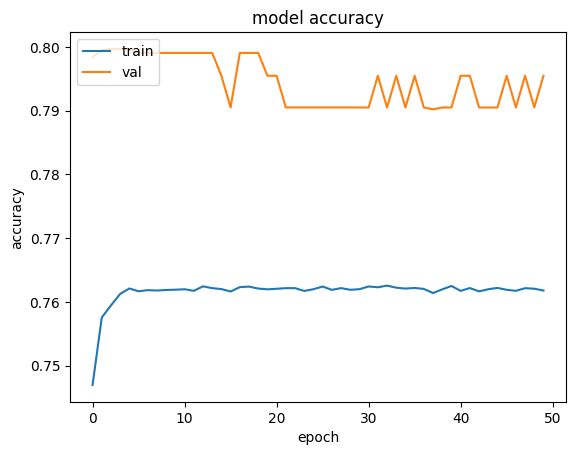

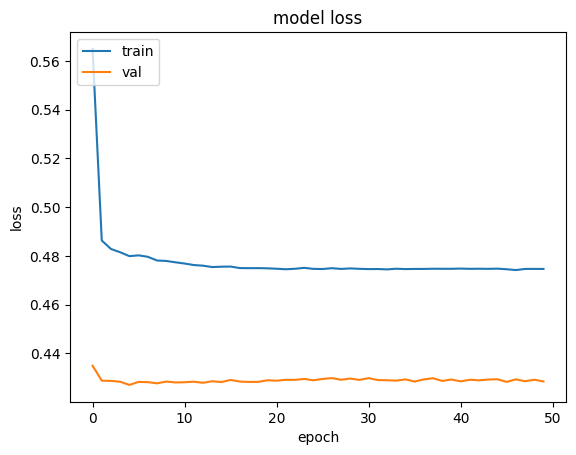

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
print()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"], loc="upper left")
plt.show()